In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os

workdata_path=os.environ['data_work']

'/home/bulbul/Documents/work_data/'

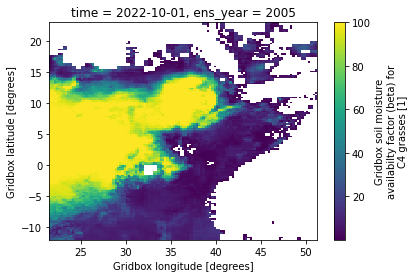

In [41]:
import xarray as xr

#db=xr.open_dataset('/home/bulbul/Documents/07-2022/impact_weather_icpac/lab/tamsat/for_training/outputs/ens_mean_wrsi_OND2022_20221005_33.5_42.0_-4.8_5.5.nc')


ens_db=f'{workdata_path}tamsat_workshpdata/for_training/trail6_outputs/ensemble_forecast_wrsi_OND2022_20221005_21.8_51.374_-11.7_23.1.nc'

db=xr.open_dataset(ens_db)

#db['time']

da=db.loc[dict(time=slice('2022-10-01T00:00:00.000000000'))]
#da.plot()
da1=da.loc[dict(ens_year=slice('2019'))]

#da2=da1.reset_coords(names="ens_year",drop=True)
#da1.plot((column="elevation_max", legend=True)
#da1=da.squeeze(["ens_year"], drop=True)

#da2=da1.reset_index('ens_year', drop=False)
#da3=da2.reset_coords(names="ens_year",drop=True)
#da2

db1=da1.squeeze("ens_year")
#db1[0].plot()

#db1[0].plot.scatter()
db2=db1.loc[dict(time=slice('2022-10-01T00:00:00.000000000'))]
#db2.plot.scatter()

import cf_xarray as cfxr
db2.beta_c4grass.cf.isel(time=0).cf.plot(x="longitude", y="latitude")

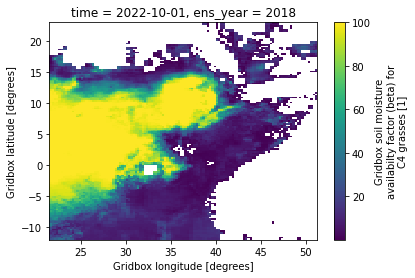

In [53]:
db=xr.open_dataset(ens_db)
import cf_xarray as cfxr
db.beta_c4grass.cf.isel(time=0,ens_year=13).cf.plot(x="longitude", y="latitude")

In [55]:
db1=db.beta_c4grass.cf.isel(time=0,ens_year=13)
db1

<xarray.DataArray 'beta_c4grass' (longitude: 119, latitude: 140)>
array([[25.09    , 19.72    , 22.14    , ...,       nan,       nan,       nan],
       [26.869999, 23.75    , 16.449999, ...,       nan,       nan,       nan],
       [31.779999, 25.369999, 15.98    , ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 2022-10-01
  * longitude  (longitude) float32 21.62 21.88 22.12 22.38 ... 50.62 50.88 51.12
  * latitude   (latitude) float32 -11.88 -11.62 -11.38 ... 22.38 22.62 22.88
    ens_year   int64 2018
Attributes:
    long_name:  Gridbox soil moisture availabilty factor (beta) for C4 grasses
    units:      1

In [57]:
import rioxarray

#rds = rioxarray.open_rasterio(ens_db)
db2=db1.transpose('latitude', 'longitude')
db2.rio.to_raster(f'{workdata_path}tamsat_workshpdata/for_training/trail6_outputs/planet_scope.tif')